## Observations and Insights 

1. Ramicane treatment data matches very closely with that of Capomulin
2. Capomulin tretment data shows strong correlation between weight and tumor volume is 0.84, which tells us that the higher the weight the greater the volume of the tumor.
3. The distribution of female or male mice in the study is quite even. i.e 49/51(female/male)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata, study_results, on=['Mouse ID'], how='left')

# Display the data table for preview
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combine_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_miceID_tp = combine_df[combine_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
dup_miceID_tp['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_df.loc[combine_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df[combine_df['Mouse ID'] != 'g989'].reset_index(drop=True)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_reg_df = clean_df.groupby(['Drug Regimen'])

tum_vol_mean = group_reg_df['Tumor Volume (mm3)'].mean()
tum_vol_median = group_reg_df['Tumor Volume (mm3)'].median()
tum_vol_var = group_reg_df['Tumor Volume (mm3)'].var()
tum_vol_sd = group_reg_df['Tumor Volume (mm3)'].std()
tum_vol_SEM = group_reg_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Tumor Vol Mean' : tum_vol_mean, 'Tumor Vol Median': tum_vol_median, \
                          'Tumor Vol Variance' : tum_vol_var, 'Tumor Vol St.Dev' : tum_vol_sd, \
                          'Tumor Vol SEM' : tum_vol_SEM })

summary_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol St.Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = group_reg_df['Tumor Volume (mm3)'].agg([('Tumor Vol Mean',"mean"), ('Tumor Vol Median',"median"), \
                                                     ('Tumor Vol Variance',"var"), ('Tumor Vol Variance',"std"), \
                                                     ('Tumor Vol SEM',"sem")])
summary_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Variance,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

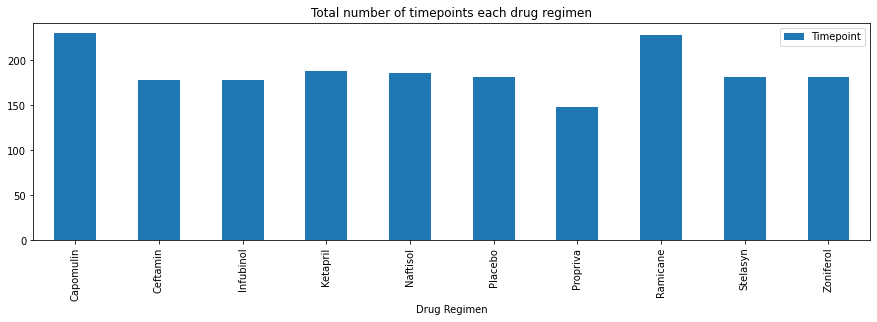

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_drug_df = group_reg_df[["Timepoint"]].count()
timepoint_drug_df.plot(kind="bar", figsize=(15,4))

# Set a title for the chart
plt.title("Total number of timepoints each drug regimen")

plt.show()
plt.tight_layout()

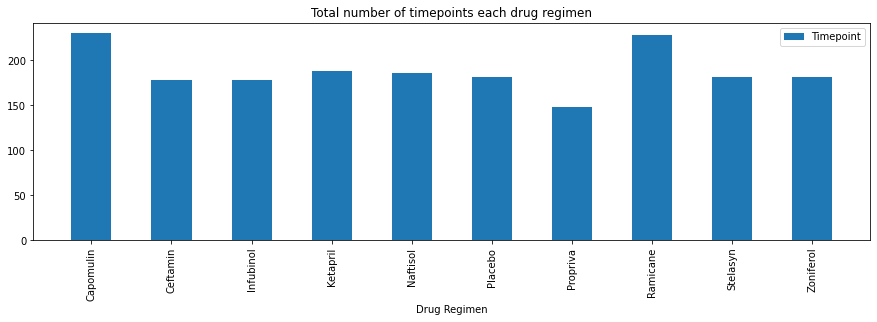

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_drug_df = group_reg_df[["Timepoint"]].count()

plt.figure(figsize=(15,4))
bar_plot = plt.bar(timepoint_drug_df.index, timepoint_drug_df["Timepoint"], width=0.5, label = timepoint_drug_df.columns[0])

# Set a title for the chart and xlabel
plt.title("Total number of timepoints each drug regimen")
plt.xlabel(timepoint_drug_df.index.name)

#Rotating xticks and setting the legend handles
plt.xticks(rotation = 'vertical')
plt.legend(handles = [bar_plot])

plt.show()

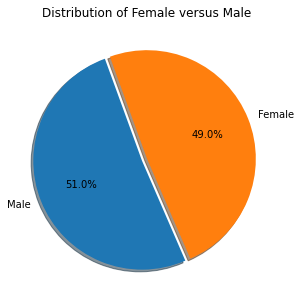

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df['Sex'].value_counts().rename('').plot(kind = 'pie', title = 'Distribution of Female versus Male',autopct='%1.1f%%', \
                                                figsize=(5, 5), shadow=True, explode=[0.05, 0.0], startangle = 110)

plt.show()



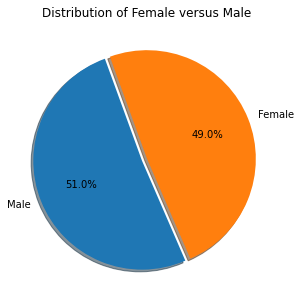

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_count = clean_df.loc[(clean_df['Sex'].str.lower() == 'female') , 'Sex'].count()
male_count = clean_df.loc[(clean_df['Sex'].str.lower() == 'male') , 'Sex'].count()

labels = ['Male', 'Female']
sizes = [male_count, female_count]
explode = (0.05, 0)

plt.figure(figsize=(15,5))
plt.pie(sizes, explode=explode, labels=labels, autopct="%.1f%%", shadow=True, startangle=110)
plt.title("Distribution of Female versus Male")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_timepoint_df = clean_df.sort_values('Timepoint', ascending=False).drop_duplicates(['Drug Regimen','Mouse ID'])

final_tum_vol_df = max_timepoint_df[max_timepoint_df['Drug Regimen'].isin(['Capomulin', \
                                                         'Ramicane', 'Infubinol', 'Ceftamin'])].reset_index(drop=True)

final_tum_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g316,Capomulin,Female,22,22,45,40.159220,2
1,y793,Capomulin,Male,17,17,45,31.896238,2
2,y865,Ceftamin,Male,23,26,45,64.729837,3
3,v923,Capomulin,Female,19,21,45,40.658124,2
4,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
95,w678,Ramicane,Female,5,24,5,43.166373,0
96,x226,Ceftamin,Male,23,28,0,45.000000,0
97,b447,Ceftamin,Male,2,30,0,45.000000,0
98,u153,Ceftamin,Female,11,25,0,45.000000,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = final_tum_vol_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
vol_list = []
count = -1
for drug in drug_list:
    count += 1
    tum_vol_s = final_tum_vol_df.loc[(final_tum_vol_df['Drug Regimen'] == drug), 'Tumor Volume (mm3)']
    vol_list.append(tum_vol_s)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = vol_list[count].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{'-' * 20} {drug} {'-' * 20}")
    print(f"The lower quartile of {drug} Drug Regimen, Tumor Volume (mm3) is: {lowerq}")
    print(f"The upper quartile of for {drug} Drug Regimen, Tumor Volume (mm3) is: {upperq}")
    print(f"The interquartile range of for {drug} Drug Regimen, Tumor Volume (mm3) is: {iqr}")
       
    # Calculate lower and upper boundary
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} could be outliers for {drug} Drug Regimen.")
    print(f"Values above {upper_bound} could be outliers for {drug} Drug Regimen.\n")
    
      
    if max(vol_list[count]) > upper_bound or min(vol_list[count]) < lower_bound:
        outlier = final_tum_vol_df.loc[(final_tum_vol_df['Drug Regimen'] == drug) & \
                                   ((final_tum_vol_df['Tumor Volume (mm3)'] > upper_bound ) | \
                                   (final_tum_vol_df['Tumor Volume (mm3)'] < lower_bound )) ]
        
        
        print(f"{'*' * 5} possible outlier for {drug} {'*' * 5}")
        print(outlier[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']].to_markdown())



-------------------- Capomulin --------------------
The lower quartile of Capomulin Drug Regimen, Tumor Volume (mm3) is: 32.37735684
The upper quartile of for Capomulin Drug Regimen, Tumor Volume (mm3) is: 40.1592203
The interquartile range of for Capomulin Drug Regimen, Tumor Volume (mm3) is: 7.781863460000004
Values below 20.70456164999999 could be outliers for Capomulin Drug Regimen.
Values above 51.83201549 could be outliers for Capomulin Drug Regimen.

-------------------- Ceftamin --------------------
The lower quartile of Ceftamin Drug Regimen, Tumor Volume (mm3) is: 48.72207785
The upper quartile of for Ceftamin Drug Regimen, Tumor Volume (mm3) is: 64.29983003
The interquartile range of for Ceftamin Drug Regimen, Tumor Volume (mm3) is: 15.577752179999997
Values below 25.355449580000002 could be outliers for Ceftamin Drug Regimen.
Values above 87.66645829999999 could be outliers for Ceftamin Drug Regimen.

-------------------- Ramicane --------------------
The lower quartile of 

C:\Users\sanoo\AppData\Local\Temp\ipykernel_16528\4267624697.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([drug_list[0]])
C:\Users\sanoo\AppData\Local\Temp\ipykernel_16528\4267624697.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([drug_list[1]])
C:\Users\sanoo\AppData\Local\Temp\ipykernel_16528\4267624697.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels([drug_list[2]])
C:\Users\sanoo\AppData\Local\Temp\ipykernel_16528\4267624697.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels([drug_list[3]])


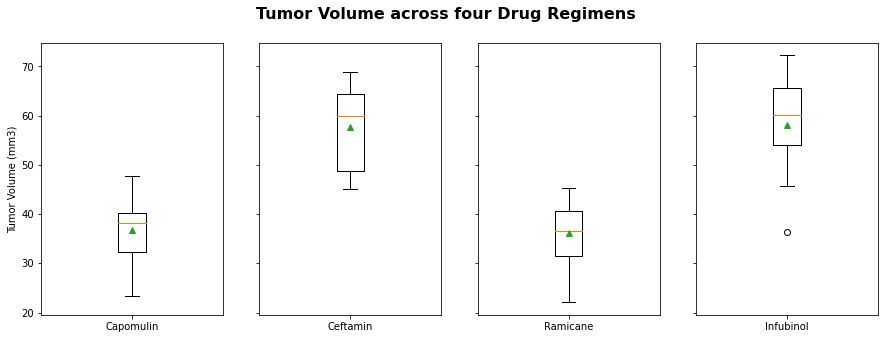

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey=True, figsize=(15,5))

fig.suptitle("Tumor Volume across four Drug Regimens", fontsize=16, fontweight="bold")
ax1.set_xticklabels([drug_list[0]])
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(vol_list[0], showmeans=True)

fig.suptitle("Tumor Volume across four Drug Regimens", fontsize=16, fontweight="bold")
ax2.set_xticklabels([drug_list[1]])
ax2.boxplot(vol_list[1], showmeans=True)


fig.suptitle("Tumor Volume across four Drug Regimens", fontsize=16, fontweight="bold")
ax3.set_xticklabels([drug_list[2]])
ax3.boxplot(vol_list[2], showmeans=True)

fig.suptitle("Tumor Volume across four Drug Regimens", fontsize=16, fontweight="bold")
ax4.set_xticklabels([drug_list[3]])
ax4.boxplot(vol_list[3], showmeans=True)

plt.show()

## Line and Scatter Plots

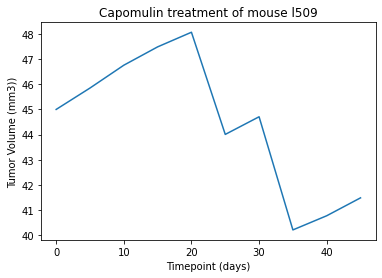

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509_df = clean_df[clean_df['Mouse ID'] == 'l509']

plt.plot(mouse_l509_df['Timepoint'], mouse_l509_df['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3))')
plt.show()

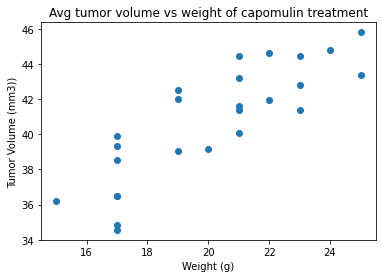

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', ['Tumor Volume (mm3)','Weight (g)', 'Mouse ID']]
avg_capomulin_df = capomulin_df.groupby('Mouse ID', as_index=False).mean()


plt.scatter(avg_capomulin_df['Weight (g)'], avg_capomulin_df['Tumor Volume (mm3)'])
plt.title('Avg tumor volume vs weight of capomulin treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3))')
plt.show()

## Correlation and Regression

The correlation between weight and tumor volume is 0.84


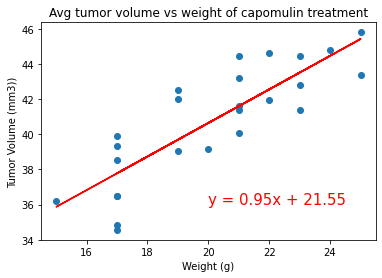

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_capomulin_df['Weight (g)'], avg_capomulin_df['Tumor Volume (mm3)'])

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_capomulin_df['Weight (g)'], \
                                                           avg_capomulin_df['Tumor Volume (mm3)'])

regress_values = avg_capomulin_df['Weight (g)'] * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(avg_capomulin_df['Weight (g)'], regress_values, "r-")

plt.scatter(avg_capomulin_df['Weight (g)'], avg_capomulin_df['Tumor Volume (mm3)'])
plt.title('Avg tumor volume vs weight of capomulin treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3))')
plt.annotate(line_equation, (20,36), fontsize=15, color="red")
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")
plt.show()
